<a href="https://colab.research.google.com/github/andremarinho17/data_analytics_projects_en/blob/main/Activity_Build_a_K_means_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Activity: Build a K-means model for a scientific organization

<p align="center"><img src="https://img.freepik.com/premium-photo/three-penguins-dressed-as-scientists-work-laboratory_14117-855700.jpg" >

Art: freepik


### **Author:** André Marinho

## **Introduction**

K-means clustering is very effective when segmenting data and attempting to find patterns. Because clustering is used in a broad array of industries, becoming proficient in this process will help you expand your skillset in a widely applicable way.   

In this activity, you are a consultant for a scientific organization that works to support and sustain penguin colonies. You are tasked with helping other staff members learn more about penguins in order to achieve this mission.

The data for this activity is in a spreadsheet that includes datapoints across a sample size of 345 penguins, such as species, island, and sex. Your will use a K-means clustering model to group this data and identify patterns that provide important insights about penguins.

**Note:** Because this lab uses a real dataset, this notebook will first require basic EDA, data cleaning, and other manipulations to prepare the data for modeling.

## **Step 1: Imports**


Import statements including `K-means`, `silhouette_score`, and `StandardScaler`.

In [ ]:
# Standard operational package imports
import numpy as np
import pandas as pd

##################################################
###  Important imports for modeling and evaluation
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
##################################################

# Visualization package import
import seaborn as sns

`Pandas` is used to load the penguins dataset, which is built into the `seaborn` library. The resulting `pandas` DataFrame is saved in a variable named `penguins`. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [ ]:
# RUN THIS CELL TO IMPORT YOUR DATA.

# Save the `pandas` DataFrame in variable `df`.

### YOUR CODE HERE ###

df = pd.read_csv("penguins.csv")

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Use the `load_dataset` function.

</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

The function is from seaborn (`sns`). It should be passed in the dataset name `'penguins'` as a string.

</details>

Now, review the first 10 rows of data.


In [ ]:
# Review the first 10 rows.

df.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,female
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,male
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Use the `head()` method.

</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

By default, the method only returns five rows. To change this, specify how many rows `(n = )` you want.

</details>

## **Step 2: Data exploration**

After loading the dataset, the next step is to prepare the data to be suitable for clustering. This includes:

*   Exploring data
*   Checking for missing values
*   Encoding data
*   Dropping a column
*   Scaling the features using `StandardScaler`

### Explore data

To cluster penguins of multiple different species, determine how many different types of penguin species are in the dataset.

In [ ]:
# Find out how many penguin types there are.

df['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Use the `unique()` method.

</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Use the `unique()` method on the column `'species'`.

</details>

In [ ]:
# Find the count of each species type.

df['species'].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Use the `value_counts()` method.

</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Use the `value_counts()` method on the column `'species'`.

</details>

**Question:** How many types of species are present in the dataset?

There are three types of species in the dataset: Adelie, Gentoo, and Chinstrap.

The **Adélie** penguin is one of the most well-known and widely studied species, found along the entire Antarctic coastline. Recognizable by the white ring around its eyes and its distinct black and white plumage, this small penguin is well-adapted to the extreme cold of the Antarctic region. Adélie penguins are highly social birds, often forming large colonies during breeding seasons. They primarily feed on krill, fish, and other marine life, diving to great depths to catch their prey. Their resilient nature and strong swimming abilities make them an important species in studying the effects of climate change on Antarctic ecosystems.

The **Gentoo** penguin is the third-largest species of penguin and is known for its distinctive white patch above the eyes and orange-red bill. Found in the sub-Antarctic islands and along the Antarctic Peninsula, the Gentoo penguin prefers ice-free land to breed. It is a highly active and fast swimmer, capable of reaching speeds of up to 36 kilometers per hour in the water. Gentoo penguins are opportunistic feeders, primarily eating krill, small fish, and squid, and are known for their strong territorial behavior during the breeding season. Their populations are generally stable, although they face threats from habitat changes and predation by seals and birds.

The **Chinstrap** penguin, named for the narrow black band under its chin, is one of the most abundant penguin species found on islands in the Southern Ocean, especially in the Antarctic Peninsula. These medium-sized penguins are known for their energetic and aggressive behavior, often seen in large, noisy colonies. Chinstrap penguins feed mostly on krill, fish, and other small marine organisms. Their breeding sites are typically located on rocky, high-altitude islands to avoid predators. While their populations are substantial, they are vulnerable to environmental disruptions such as changes in sea ice and food availability, which can impact their survival and breeding success.

**Question:** Why is it helpful to determine the perfect number of clusters using K-means when you already know how many penguin species the dataset contains?

Even if the number of penguin species is known, using K-means to determine the optimal number of clusters helps validate the assumptions and ensure the dataset naturally groups into those species. It can also reveal hidden patterns, identify noisy or incomplete data, and improve the accuracy of further analysis.

### Check for missing values

An assumption of K-means is that there are no missing values. Check for missing values in the rows of the data.

In [ ]:
# Check for missing values.

df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Use the `isnull` and `sum` methods.

</details>

Now, drop the rows with missing values and save the resulting pandas DataFrame in a variable named `df_subset`.

In [ ]:
# Drop rows with missing values.
# Save DataFrame in variable `df_subset`.

df_subset = df.dropna(axis=0).reset_index(drop = True)

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Use `dropna`. Note that an axis parameter passed in to this function should be set to 0 if you want to drop rows containing missing values or 1 if you want to drop columns containing missing values. Optionally, `reset_index` may also be used to avoid a SettingWithCopy warning later in the notebook.
</details>

Next, check to make sure that `df_subset` does not contain any missing values.

In [ ]:
# Check for missing values.

df_subset.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

Now, review the first 10 rows of the subset.

In [ ]:
# View first 10 rows.

df_subset.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male


### Encode data

Some versions of the penguins dataset have values encoded in the sex column as 'Male' and 'Female' instead of 'MALE' and 'FEMALE'. The code below will make sure all values are ALL CAPS.


In [ ]:
df_subset['sex'] = df_subset['sex'].str.upper()

K-means needs numeric columns for clustering. Convert the categorical column `'sex'` into numeric. There is no need to convert the `'species'` column because it isn't being used as a feature in the clustering algorithm.

In [ ]:
# Convert `sex` column from categorical to numeric.

df_subset = pd.get_dummies(df_subset, drop_first = True, columns=['sex'])

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Use the `get_dummies` function.

</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

The `drop_first` parameter should be set to `True`. This removes redundant data. The `columns` parameter can **optionally** be set to `['sex']` to specify that only the `'sex'` column gets this operation performed on it.

</details>

### Drop a column

Drop the categorical column `island` from the dataset. While it has value, this notebook is trying to confirm if penguins of the same species exhibit different physical characteristics based on sex. This doesn't include location.

Note that the `'species'` column is not numeric. Don't drop the `'species'` column for now. It could potentially be used to help understand the clusters later.

In [ ]:
df.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [ ]:
# Drop the island column.

df_subset = df_subset.drop(['island'], axis=1)

### Scale the features

Because K-means uses distance between observations as its measure of similarity, it's important to scale the data before modeling. Use a third-party tool, such as scikit-learn's `StandardScaler` function. `StandardScaler` scales each point xᵢ by subtracting the mean observed value for that feature and dividing by the standard deviation:

x-scaled = (xᵢ – mean(X)) / σ

This ensures that all variables have a mean of 0 and variance/standard deviation of 1.

**Note:** Because the species column isn't a feature, it doesn't need to be scaled.

First, copy all the features except the `'species'` column to a DataFrame `X`.

In [ ]:
# Exclude `species` variable from X

X = df_subset.drop(['species'], axis=1)
X.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex_MALE
0,39.1,18.7,181.0,3750.0,1
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
3,36.7,19.3,193.0,3450.0,0
4,39.3,20.6,190.0,3650.0,1


<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Use`drop()`.
</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Select all columns except `'species'.`The `axis` parameter passed in to this method should be set to `1` if you want to drop columns.
</details>

Scale the features in `X` using `StandardScaler`, and assign the scaled data to a new variable `X_scaled`.

In [ ]:
#Scale the features.
#Assign the scaled data to variable `X_scaled`.

X_scaled = StandardScaler().fit_transform(X)
X_scaled[:2,:]

array([[-0.89604189,  0.7807321 , -1.42675157, -0.56847478,  0.99103121],
       [-0.82278787,  0.11958397, -1.06947358, -0.50628618, -1.00904996]])

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Instantiate StandardScaler to transform the data in a single step.
</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Use the `.fit_transform()` method and pass in the data as an argument.
</details>

## **Step 3: Data modeling**

Now, fit K-means and evaluate inertia for different values of k. Because you may not know how many clusters exist in the data, start by fitting K-means and examining the inertia values for different values of k. To do this, write a function called `kmeans_inertia` that takes in `num_clusters` and `x_vals` (`X_scaled`) and returns a list of each k-value's inertia.

When using K-means inside the function, set the `random_state` to `42`. This way, others can reproduce your results.

In [ ]:
# Fit K-means and evaluate inertia for different values of k.

num_clusters = [i for i in range(2, 11)]

def kmeans_inertia(num_clusters, x_vals):
    """
    Accepts as arguments list of ints and data array.
    Fits a KMeans model where k = each value in the list of ints.
    Returns each k-value's inertia appended to a list.
    """
    inertia = []
    for num in num_clusters:
        kms = KMeans(n_clusters=num, random_state=42)
        kms.fit(x_vals)
        inertia.append(kms.inertia_)

    return inertia

Use the `kmeans_inertia` function to return a list of inertia for k=2 to 10.

In [ ]:
# Return a list of inertia for k=2 to 10.

inertia = kmeans_inertia(num_clusters, X_scaled)
inertia

[885.6224143652249,
 578.8284278107235,
 386.14534424773285,
 284.5464837898288,
 217.92858573807678,
 201.39287843423264,
 186.82270634899209,
 173.47283154242746,
 164.55854201979943]

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Review the material about the `kmeans_inertia` function.
</details>

Next, create a line plot that shows the relationship between `num_clusters` and `inertia`.
Use either seaborn or matplotlib to visualize this relationship.

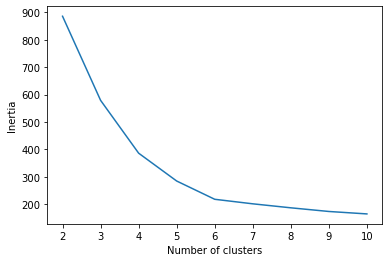

In [ ]:
# Create a line plot.

# Create an elbow plot
plot = sns.lineplot(x=num_clusters, y=inertia)
plot.set_xlabel("Number of clusters");
plot.set_ylabel("Inertia");

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Use `sns.lineplot`.
</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Include `x=num_clusters` and `y=inertia`.
</details>

**Question:** Where is the elbow in the plot?

The elbow plot starts to shape after the number of 6 clusters. Next, the silhouette score will be used to check if the model with six clusters is optimal.

## **Step 4: Results and evaluation**

Now, evaluate the silhouette score using the `silhouette_score()` function. Silhouette scores are used to study the distance between clusters.

Then, compare the silhouette score of each value of k, from 2 through 10. To do this, write a function called `kmeans_sil` that takes in `num_clusters` and `x_vals` (`X_scaled`) and returns a list of each k-value's silhouette score.

In [ ]:
# Evaluate silhouette score.
# Write a function to return a list of each k-value's score.

def kmeans_sil(num_clusters, x_vals):
    '''
    Fits a KMeans model for different values of k.
    Calculates a silhouette score for each k value

    Args:
        num_clusters: (list of ints)  - The different k values to try
        x_vals:       (array)         - The training data

    Returns:
        sil_score:    (list)          - A list of silhouette scores, one for each \
                                      value of k
    '''

    sil_score = []
    for num in num_clusters:
        kms = KMeans(n_clusters=num, random_state=42)
        kms.fit(x_vals)
        sil_score.append(silhouette_score(x_vals, kms.labels_))

    return sil_score

In [ ]:
# Calculate silhouette scores for k=2-10
sil_score = kmeans_sil(num_clusters, X_scaled)
sil_score

[0.44398088353055243,
 0.45101024097188364,
 0.5080140996630784,
 0.519998574860868,
 0.5263224884981607,
 0.47774022332151733,
 0.42680523270292947,
 0.35977478703657334,
 0.3589883410610364]

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Review the `kmeans_sil` function video.
</details>

Next, create a line plot that shows the relationship between `num_clusters` and `sil_score`.
Use either seaborn or matplotlib to visualize this relationship.

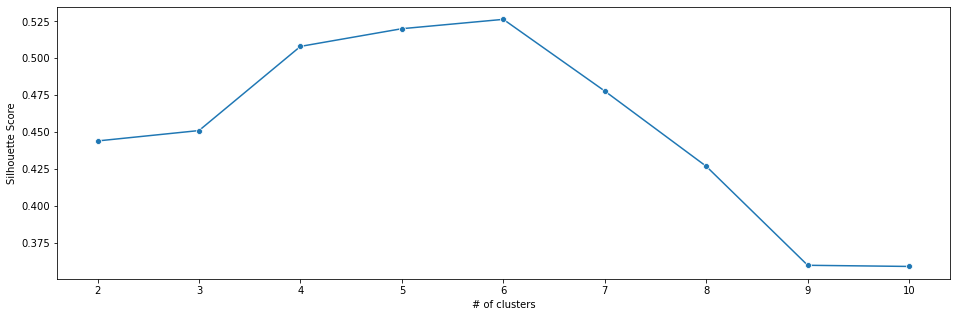

In [ ]:
plot = sns.lineplot(x=num_clusters, y=sil_score, marker = 'o')
plot.set_xlabel("# of clusters");
plot.set_ylabel("Silhouette Score");

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Use `sns.lineplot`.
</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Include `x=num_clusters` and `y=sil_score`.
</details>

**Question:** What does the graph show?

The graph shows that the optimal value of clusters is 6, with the highest silhouette score of about 0.525.

### Optimal k-value

To decide on an optimal k-value, fit a six-cluster model to the dataset.

In [ ]:
# Fit a 6-cluster model.

kmeans6 = KMeans(n_clusters=6, random_state=42)
kmeans6.fit(X_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Make an instance of the model with `num_clusters = 6` and use the `fit` function on `X_scaled`.
</details>




Print out the unique labels of the fit model.

In [ ]:
# Print unique labels.

print(kmeans6.labels_[:6])
print('Unique labels:', np.unique(kmeans6.labels_))

[0 2 2 2 0 2]
Unique labels: [0 1 2 3 4 5]


Now, create a new column `cluster` that indicates cluster assignment in the DataFrame `df_subset`. It's important to understand the meaning of each cluster's labels, then decide whether the clustering makes sense.

**Note:** This task is done using `df_subset` because it is often easier to interpret unscaled data.

In [ ]:
# Create a new column `cluster`.

df_subset['cluster'] = kmeans6.labels_
df_subset.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex_MALE,cluster
0,Adelie,39.1,18.7,181.0,3750.0,1,0
1,Adelie,39.5,17.4,186.0,3800.0,0,2
2,Adelie,40.3,18.0,195.0,3250.0,0,2
3,Adelie,36.7,19.3,193.0,3450.0,0,2
4,Adelie,39.3,20.6,190.0,3650.0,1,0


Use `groupby` to verify if any `'cluster'` can be differentiated by `'species'`.

In [ ]:
# Verify if any `cluster` can be differentiated by `species`.

df_subset.groupby(by=['cluster', 'species']).size()

cluster  species  
0        Adelie       71
1        Gentoo       58
2        Adelie       73
         Chinstrap     5
3        Gentoo       61
4        Adelie        2
         Chinstrap    34
5        Chinstrap    29
dtype: int64

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Use `groupby(by=['cluster', 'species'])`.

</details>


<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>


Use an aggregation function such as `size`.

</details>

Next, interpret the groupby outputs. Although the results of the groupby show that each `'cluster'` can be differentiated by `'species'`, it is useful to visualize these results. The graph shows that each `'cluster'` can be differentiated by `'species'`.

**Note:** The code for the graph below is outside the scope of this lab.

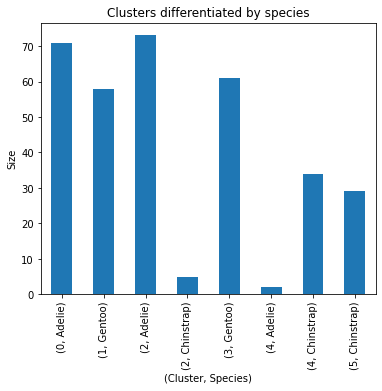

In [ ]:
df_subset.groupby(by=['cluster', 'species']).size().plot.bar(title='Clusters differentiated by species',
                                                                   figsize=(6, 5),
                                                                   ylabel='Size',
                                                                   xlabel='(Cluster, Species)');

Use `groupby` to verify if each `'cluster'` can be differentiated by `'species'` AND `'sex_MALE'`.

In [ ]:
# Verify if each `cluster` can be differentiated by `species' AND `sex_MALE`.

df_subset.groupby(by=['cluster', 'species', 'sex_MALE']).size().sort_values(ascending = False)

cluster  species    sex_MALE
2        Adelie     0           73
0        Adelie     1           71
3        Gentoo     1           61
1        Gentoo     0           58
4        Chinstrap  1           34
5        Chinstrap  0           29
2        Chinstrap  0            5
4        Adelie     1            2
dtype: int64

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Use `groupby(by=['cluster','species', 'sex_MALE'])`.
</details>


<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Use an aggregation function such as `size`.
</details>

**Question:** Are the clusters differentiated by `'species'` and `'sex_MALE'`?

It's evident that the algorithm created clusters that are primarily distinguished by species and sex.

Finally, interpret the groupby outputs and visualize these results. The graph shows that each `'cluster'` can be differentiated by `'species'` and `'sex_MALE'`. Furthermore, each cluster is mostly comprised of one sex and one species.

**Note:** The code for the graph below is outside the scope of this lab.

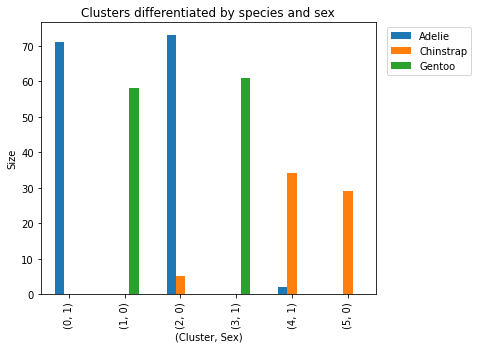

In [ ]:
df_subset.groupby(by=['cluster','species','sex_MALE']).size().unstack(level = 'species', fill_value=0).plot.bar(title='Clusters differentiated by species and sex',
                                                                                                                      figsize=(6, 5),
                                                                                                                      ylabel='Size',
                                                                                                                      xlabel='(Cluster, Sex)')
plt.legend(bbox_to_anchor=(1.3, 1.0))

## **Considerations**


**What summary would you provide to stakeholders?**

Based on the k-means clustering analysis, 6 distinct clusters were identified, with clear differentiation by species (Adelie, Gentoo, Chinstrap) and sex. The results indicate that the clusters are predominantly characterized by the sex (male vs. female) and species of the penguins, as shown in the table. For instance, the Adelie species is most prominent in clusters 0 and 2, with a higher concentration of males in cluster 0 (71 males) and females in cluster 2 (73 females). Similarly, Gentoo penguins are primarily found in clusters 1 and 3, with males more frequent in cluster 1 (61 males) and females in cluster 3 (58 females). Chinstrap penguins are spread across clusters 4 and 5, with males being more prevalent in cluster 4 (34 males) and females in cluster 5 (29 females), with a smaller group of females (5) in cluster 2.

These insights empower the decision-making by tailoring conservation strategies more effectively. By recognizing that specific species and sex groups form distinct clusters, the organizatin should prioritize efforts based on these segments. For example, it's recommended to implement gender-specific monitoring and conservation actions for each species, addressing the unique needs of each group. This detailed segmentation enables the organization to manage and sustain the penguin colonies more efficiently, optimizing resource allocation and guiding more targeted intervention strategies.

### References

[Gorman, Kristen B., et al. “Ecological Sexual Dimorphism and Environmental Variability within a Community of Antarctic Penguins (Genus Pygoscelis).” PLOS ONE, vol. 9, no. 3, Mar. 2014, p. e90081. PLoS Journals](https://doi.org/10.1371/journal.pone.0090081)

[Sklearn Preprocessing StandardScaler scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged